# Zomato data analysis project

## Step 1 - Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Create the data frame

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data Analysis Projects/Zomato_Data_Analysis_Project/zomato_data .csv')
print(df)


                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

## Convert the data type of column - rate

In [19]:
def convert_rate(value):
    if isinstance(value, str):
        value = value.replace('/5', '')
        return float(value)
    else:
        return value

In [20]:
df['rate'] = df['rate'].apply(convert_rate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of restaurant

In [22]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Count of Restaurants by Type')

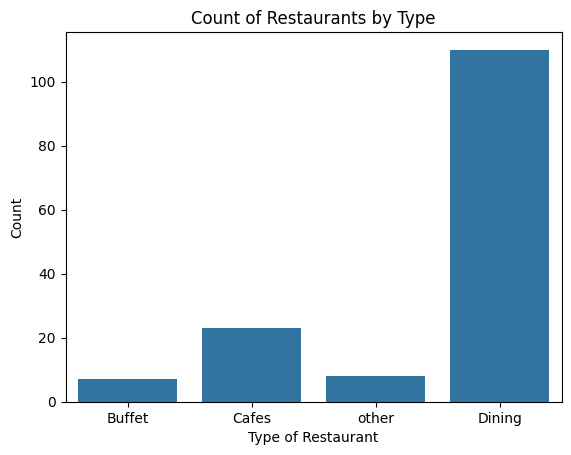

In [23]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Count of Restaurants by Type')

## Conclusion - Majority of the restaurant falls in dinning category

In [24]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Total Votes for Each Type of Restaurant')

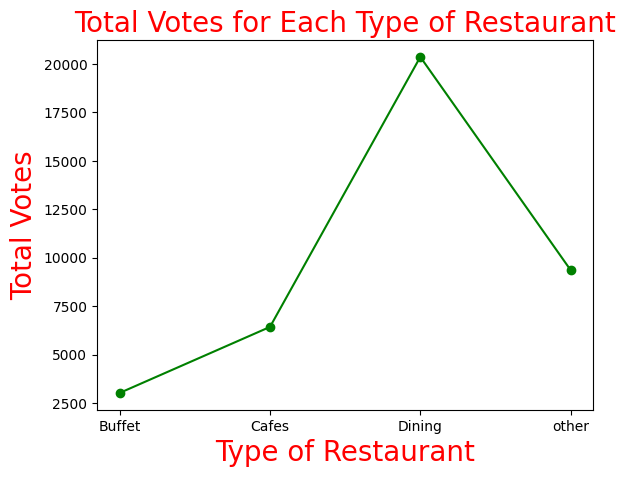

In [25]:
grouped_df = df.groupby('listed_in(type)')['votes'].sum()
res = pd.DataFrame({'votes': grouped_df})
plt.plot(res, c='green', marker="o")
plt.xlabel('Type of Restaurant', c='red', size=20)
plt.ylabel('Total Votes', c='red', size=20)
plt.title('Total Votes for Each Type of Restaurant', c='red', size=20)


## Conclusion - Dinning restaurants has received maximum votes

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


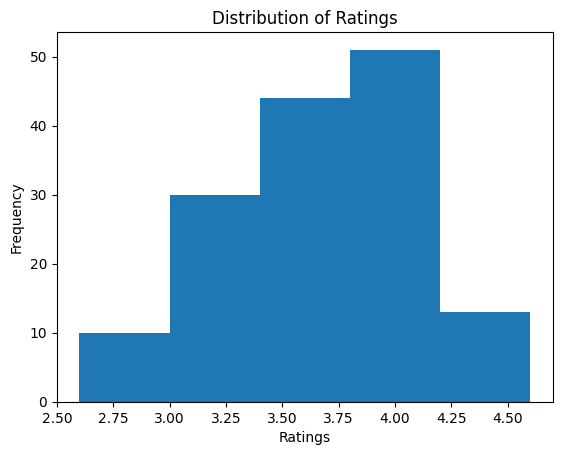

In [27]:
plt.hist(df['rate'], bins = 5)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

## Conclusion - The majority restaurants received ratings from 3.5 to 4

## Average order spend by couples

In [28]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

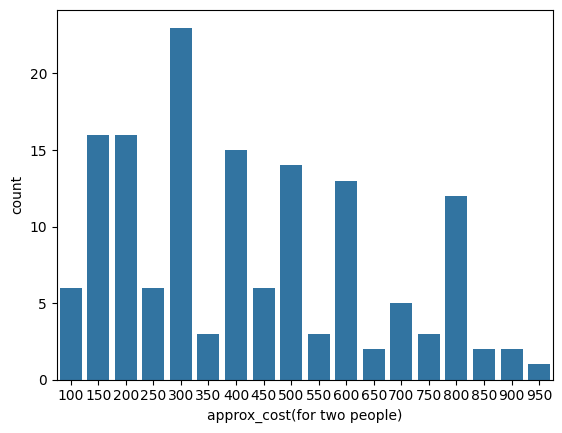

In [29]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion - The majority of couples prefer restaurants with an approximate cost of 300 rupees

## Which mode receives maximum rating

In [30]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Online Order vs. Rating')

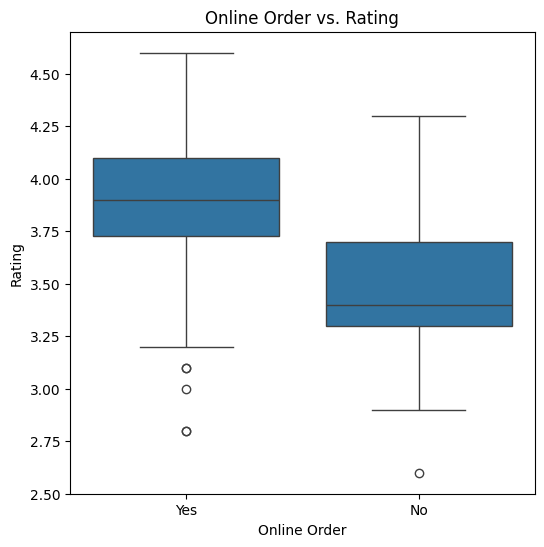

In [31]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Online Order vs. Rating')

## Conclusion - Offline order received lower rating in comparison to online order

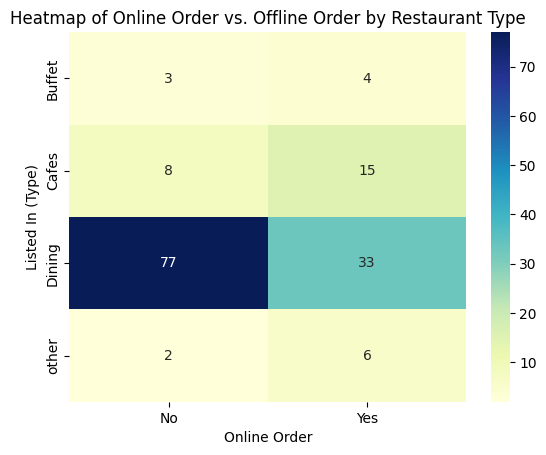

In [32]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Online Order vs. Offline Order by Restaurant Type')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

## Conclusion - Dining restaurants primarily accept offline orders, whereas cafes promarily receive online orders. This suggests that clients prefer order in person at restaurants, but prefer online ordering at cafes